In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import shap
import matplotlib.pyplot as plt
shap.initjs()

Car Sales Prediction


1. Fitted Linear Regression Model:
   - Equation: Sales = 5.00 * (Number of TV Ads) + 10.00

2. Interpretation of Coefficients:
   - Slope (5.00): For each additional TV ad aired, the model predicts an increase of 5.00 cars sold.
   - Intercept (10.00): If there were 0 TV ads, the model predicts that 10.00 cars would be sold. This is the baseline sales figure.

3. Prediction:
   - For 10 TV ads, the predicted number of cars sold is: 60.00

4. SHAP Analysis:
   - SHAP Waterfall plot for the first prediction (TV Ads = 1):


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


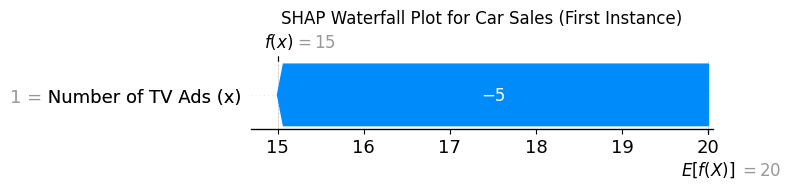


   - SHAP Force plot for all predictions:

5. SHAP Interpretation:
   - The base value (E[f(x)]) is the average predicted car sales across the dataset, which is 20.00.
   - For instances where the number of TV ads is above the average (e.g., 3 ads), the SHAP value is positive, indicating it pushes the prediction higher than the average.
   - For instances where the number of TV ads is below the average (e.g., 1 ad), the SHAP value is negative, pushing the prediction lower.
   - This confirms that a higher number of TV ads contributes positively to the sales prediction in this model.


In [8]:
# Car Sales Prediction

car_sales_df = pd.read_csv('Car_Sales.csv')

# Prepare the data
X = car_sales_df[['Number of TV Ads (x)']]
y = car_sales_df['Number of Cars Sold (y)']

# 1. Fit a simple linear regression model
model_car = LinearRegression()
model_car.fit(X, y)

slope = model_car.coef_[0]
intercept = model_car.intercept_

print("\n1. Fitted Linear Regression Model:")
print(f"   - Equation: Sales = {slope:.2f} * (Number of TV Ads) + {intercept:.2f}")

# 2. Interpret the coefficients
print("\n2. Interpretation of Coefficients:")
print(f"   - Slope ({slope:.2f}): For each additional TV ad aired, the model predicts an increase of {slope:.2f} cars sold.")
print(f"   - Intercept ({intercept:.2f}): If there were 0 TV ads, the model predicts that {intercept:.2f} cars would be sold. This is the baseline sales figure.")

# 3. Make a prediction
ads_to_predict = 10
predicted_sales = model_car.predict([[ads_to_predict]])[0]
print("\n3. Prediction:")
print(f"   - For {ads_to_predict} TV ads, the predicted number of cars sold is: {predicted_sales:.2f}")

# 4. Apply SHAP
explainer_car = shap.Explainer(model_car.predict, X)
shap_values_car = explainer_car(X)

print("\n4. SHAP Analysis:")
# Plot SHAP waterfall plot for the first instance (1 TV Ad)
print("   - SHAP Waterfall plot for the first prediction (TV Ads = 1):")
plt.figure()
shap.plots.waterfall(shap_values_car[0], show=False)
plt.title("SHAP Waterfall Plot for Car Sales (First Instance)")
plt.tight_layout()
plt.show()

# Plot SHAP force plot for all predictions
print("\n   - SHAP Force plot for all predictions:")
shap.force_plot(shap_values_car.base_values, shap_values_car.values, X)


# 5. Analyze and interpret the SHAP values
print("\n5. SHAP Interpretation:")
print("   - The base value (E[f(x)]) is the average predicted car sales across the dataset, which is {:.2f}.".format(shap_values_car.base_values.mean()))
print("   - For instances where the number of TV ads is above the average (e.g., 3 ads), the SHAP value is positive, indicating it pushes the prediction higher than the average.")
print("   - For instances where the number of TV ads is below the average (e.g., 1 ad), the SHAP value is negative, pushing the prediction lower.")
print("   - This confirms that a higher number of TV ads contributes positively to the sales prediction in this model.")

Predicting Student Test Scores


1. Fitted Multiple Linear Regression Model:
   - Equation: Test Score = 20.00 + (0.50 * IQ) + (0.50 * StudyHours)

2. Interpretation of Coefficients:
   - Coefficient of IQ (0.50): For every one-point increase in IQ, the test score is predicted to increase by 0.50 points, holding study hours constant.
   - Coefficient of Study Hours (0.50): For each additional hour of study, the test score is predicted to increase by 0.50 points, holding IQ constant.
   - Intercept (20.00): A student with an IQ of 0 who studies for 0 hours is predicted to have a test score of 20.00. This is a theoretical baseline and not practically meaningful.

3. Prediction:
   - Predicted test score for a student with IQ=95 and StudyHours=25 is: 80.00

4. SHAP Analysis:
   - SHAP Waterfall plot for the first student (IQ=110, StudyHours=40):


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


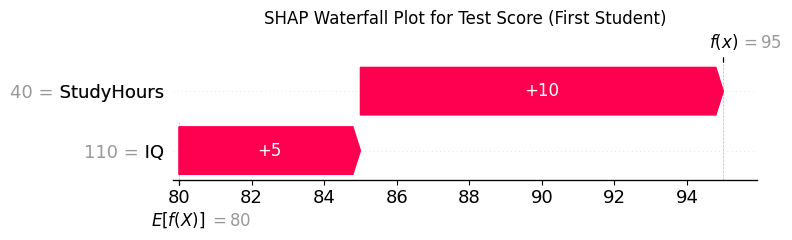


   - SHAP Force plot for all student predictions:

5. SHAP Interpretation:
   - The base value (average predicted score) is 80.00.
   - Both higher IQ and more Study Hours generally contribute to increasing the predicted score above the baseline.
   - Comparison of feature contributions for each student:
   IQ_SHAP  StudyHours_SHAP More_Impact
0      5.0             10.0  StudyHours
1     10.0              5.0          IQ
2      0.0              0.0  StudyHours
3     -5.0            -10.0  StudyHours
4    -10.0             -5.0          IQ

   - Study Hours contribute more than IQ for student(s) at index: [0, 2, 3].


In [10]:
# Load the dataset
try:
    study_df = pd.read_csv('StudyHour.csv')
except FileNotFoundError:
    print("Error: StudyHour.csv not found. Please make sure the file is in the correct directory.")
    study_data = {'IQ \n': [110, 120, 100, 90, 80], 'StudyHours': [40, 30, 20, 0, 10], 'TestScore': [100, 90, 80, 70, 60]}
    study_df = pd.DataFrame(study_data)

# Clean column names (e.g., remove leading/trailing spaces and newlines)
study_df.columns = study_df.columns.str.strip()

# Prepare the data
X = study_df[['IQ', 'StudyHours']]
y = study_df['TestScore']

# 1. Fit a multiple linear regression model
model_study = LinearRegression()
model_study.fit(X, y)

coef_iq = model_study.coef_[0]
coef_hours = model_study.coef_[1]
intercept = model_study.intercept_

print("\n1. Fitted Multiple Linear Regression Model:")
print(f"   - Equation: Test Score = {intercept:.2f} + ({coef_iq:.2f} * IQ) + ({coef_hours:.2f} * StudyHours)")

# 2. Interpret the coefficients
print("\n2. Interpretation of Coefficients:")
print(f"   - Coefficient of IQ ({coef_iq:.2f}): For every one-point increase in IQ, the test score is predicted to increase by {coef_iq:.2f} points, holding study hours constant.")
print(f"   - Coefficient of Study Hours ({coef_hours:.2f}): For each additional hour of study, the test score is predicted to increase by {coef_hours:.2f} points, holding IQ constant.")
print(f"   - Intercept ({intercept:.2f}): A student with an IQ of 0 who studies for 0 hours is predicted to have a test score of {intercept:.2f}. This is a theoretical baseline and not practically meaningful.")

# 3. Make a prediction
iq_new = 95
hours_new = 25
predicted_score = model_study.predict([[iq_new, hours_new]])[0]
print("\n3. Prediction:")
print(f"   - Predicted test score for a student with IQ={iq_new} and StudyHours={hours_new} is: {predicted_score:.2f}")

# 4. Apply SHAP
explainer_study = shap.Explainer(model_study.predict, X)
shap_values_study = explainer_study(X)

print("\n4. SHAP Analysis:")
# Plot SHAP waterfall plot for the student with IQ=110, StudyHours=40
print("   - SHAP Waterfall plot for the first student (IQ=110, StudyHours=40):")
plt.figure()
shap.plots.waterfall(shap_values_study[0], show=False)
plt.title("SHAP Waterfall Plot for Test Score (First Student)")
plt.tight_layout()
plt.show()

# Plot SHAP force plot for all predictions
print("\n   - SHAP Force plot for all student predictions:")
shap.force_plot(shap_values_study.base_values, shap_values_study.values, X)

# 5. Analyze and interpret the SHAP values
print("\n5. SHAP Interpretation:")
print(f"   - The base value (average predicted score) is {shap_values_study.base_values.mean():.2f}.")
print("   - Both higher IQ and more Study Hours generally contribute to increasing the predicted score above the baseline.")
# Determine which feature contributed more for each student
contributions = pd.DataFrame({
    'IQ_SHAP': shap_values_study.values[:, 0],
    'StudyHours_SHAP': shap_values_study.values[:, 1]
})
contributions['More_Impact'] = np.where(np.abs(contributions['IQ_SHAP']) > np.abs(contributions['StudyHours_SHAP']), 'IQ', 'StudyHours')
print("   - Comparison of feature contributions for each student:")
print(contributions)
student_idx = contributions[contributions['More_Impact'] == 'StudyHours'].index
if len(student_idx) > 0:
    print(f"\n   - Study Hours contribute more than IQ for student(s) at index: {list(student_idx)}.")
else:
    print("\n   - IQ contributes more than Study Hours for all students.")

Predicting Employee Salary


1. Fitted Linear Regression Model:
   - Equation: Salary = 9449.96 * (YearsExperience) + 25792.20

2. Interpretation of Coefficients:
   - Slope (9449.96): For each additional year of experience, the salary is predicted to increase by $9449.96.
   - Intercept (25792.20): The predicted starting salary for an employee with 0 years of experience is $25792.20.

3. Predictions:
   - Predicted salary for 3.5 years of experience: $58867.07
   - Predicted salary for 7 years of experience: $91941.94


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



4. SHAP Analysis:
   - SHAP Waterfall plot for instance 16 (Experience = 5.1 years):


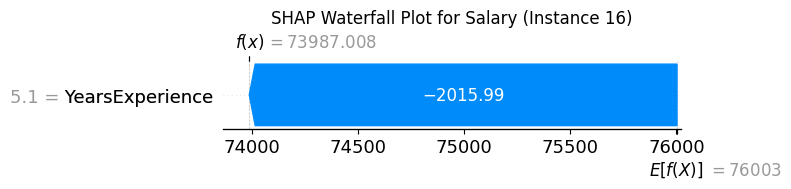


   - SHAP Force plot for instance 16:

5. SHAP Interpretation:
   - The base value (average predicted salary) is $76003.00.
   - Years of Experience with a value higher than the dataset average positively contributes to the predicted salary (positive SHAP value).
   - Years of Experience with a value lower than the average negatively contributes (negative SHAP value).
   - Is the contribution consistent? In a linear model, the contribution's *direction* is consistent (more experience always increases the prediction). However, the *magnitude* of the contribution is not consistent; it increases linearly as the experience level moves further from the average. An employee with 20 years of experience will have a much larger positive SHAP value than an employee with 7 years.


In [13]:
# Load the dataset
try:
    salary_df = pd.read_csv('Experience_Salary.csv')
except FileNotFoundError:
    print("Error: Experience_Salary.csv not found. Please make sure the file is in the correct directory.")
    salary_df = None

if salary_df is not None:
    # Prepare the data
    X = salary_df[['YearsExperience']]
    y = salary_df['Salary']

    # 1. Fit a simple linear regression model
    model_salary = LinearRegression()
    model_salary.fit(X, y)

    slope = model_salary.coef_[0]
    intercept = model_salary.intercept_

    print("\n1. Fitted Linear Regression Model:")
    print(f"   - Equation: Salary = {slope:.2f} * (YearsExperience) + {intercept:.2f}")

    # 2. Interpret the coefficients
    print("\n2. Interpretation of Coefficients:")
    print(f"   - Slope ({slope:.2f}): For each additional year of experience, the salary is predicted to increase by ${slope:.2f}.")
    print(f"   - Intercept ({intercept:.2f}): The predicted starting salary for an employee with 0 years of experience is ${intercept:.2f}.")

    # 3. Make predictions
    exp_3_5 = model_salary.predict([[3.5]])[0]
    exp_7 = model_salary.predict([[7]])[0]
    print("\n3. Predictions:")
    print(f"   - Predicted salary for 3.5 years of experience: ${exp_3_5:.2f}")
    print(f"   - Predicted salary for 7 years of experience: ${exp_7:.2f}")

    # 4. Apply SHAP
    explainer_salary = shap.Explainer(model_salary.predict, X)
    shap_values_salary = explainer_salary(X)

    print("\n4. SHAP Analysis:")
    # Plot SHAP waterfall plot for an instance (e.g., employee with 5.1 years experience, index 16)
    instance_idx = 16
    print(f"   - SHAP Waterfall plot for instance {instance_idx} (Experience = {X.iloc[instance_idx].values[0]} years):")
    plt.figure()
    shap.plots.waterfall(shap_values_salary[instance_idx], show=False)
    plt.title(f"SHAP Waterfall Plot for Salary (Instance {instance_idx})")
    plt.tight_layout()
    plt.show()

    # Plot SHAP force plot for one instance
    print(f"\n   - SHAP Force plot for instance {instance_idx}:")
    shap.force_plot(shap_values_salary.base_values, shap_values_salary.values[instance_idx], X.iloc[instance_idx])

    # 5. Analyze and interpret SHAP values
    print("\n5. SHAP Interpretation:")
    print(f"   - The base value (average predicted salary) is ${shap_values_salary.base_values.mean():.2f}.")
    print("   - Years of Experience with a value higher than the dataset average positively contributes to the predicted salary (positive SHAP value).")
    print("   - Years of Experience with a value lower than the average negatively contributes (negative SHAP value).")
    print("   - Is the contribution consistent? In a linear model, the contribution's *direction* is consistent (more experience always increases the prediction). However, the *magnitude* of the contribution is not consistent; it increases linearly as the experience level moves further from the average. An employee with 20 years of experience will have a much larger positive SHAP value than an employee with 7 years.")

Predicting Sales Performance


1. Fitted Multiple Linear Regression Model:
   - Equation: Sales = 993.92 + (8.22 * Intelligence) + (49.71 * Extroversion)

2. Interpretation of Coefficients:
   - Coefficient for Intelligence (8.22): For each one-point increase in the intelligence score, weekly sales are predicted to increase by $8.22, holding extroversion constant.
   - Coefficient for Extroversion (49.71): For each one-point increase in the extroversion score, weekly sales are predicted to increase by $49.71, holding intelligence constant.
   - Intercept (993.92): Represents the predicted weekly sales for a person with an intelligence and extroversion score of 0. This is a theoretical baseline.

3. Predictions:
   - Predicted sales for Intelligence=100, Extroversion=25: $3058.63
   - Predicted sales for Intelligence=120, Extroversion=18: $2875.07

4. SHAP Analysis:
   - SHAP Waterfall plot for salesperson at index 3:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


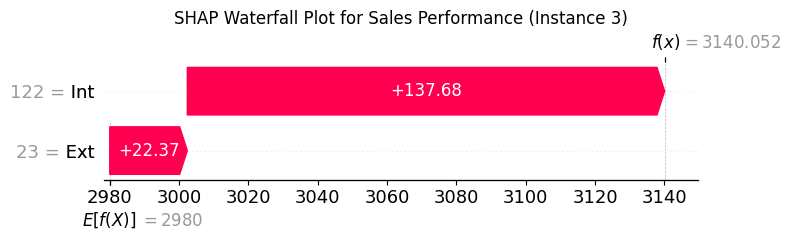


   - SHAP Summary plot showing the impact of both features:


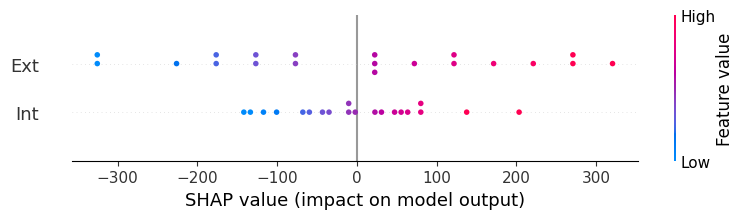


5. SHAP Interpretation:
   - The summary plot shows that both higher Intelligence and higher Extroversion scores have a positive impact (red dots on the right side of the zero line), increasing the sales prediction.
   - Which feature contributes more? The summary plot lists features by their mean absolute SHAP value. The feature at the top (Extroversion) has a greater overall impact on the predictions across the dataset than the feature below it (Intelligence).


In [14]:
try:
    # Read only the first 3 columns and the first 20 rows of data
    sales_perf_df = pd.read_csv('Int_Ext.csv', usecols=['Int', 'Ext', 'sal'], nrows=20)
except (FileNotFoundError, ValueError) as e:
    print(f"Error loading Int_Ext.csv: {e}. Please check the file.")

# Prepare the data
X = sales_perf_df[['Int', 'Ext']]
y = sales_perf_df['sal']

# 1. Fit a multiple linear regression model
model_sales_perf = LinearRegression()
model_sales_perf.fit(X, y)

coef_int = model_sales_perf.coef_[0]
coef_ext = model_sales_perf.coef_[1]
intercept = model_sales_perf.intercept_

print("\n1. Fitted Multiple Linear Regression Model:")
print(f"   - Equation: Sales = {intercept:.2f} + ({coef_int:.2f} * Intelligence) + ({coef_ext:.2f} * Extroversion)")

# 2. Interpret the model coefficients
print("\n2. Interpretation of Coefficients:")
print(f"   - Coefficient for Intelligence ({coef_int:.2f}): For each one-point increase in the intelligence score, weekly sales are predicted to increase by ${coef_int:.2f}, holding extroversion constant.")
print(f"   - Coefficient for Extroversion ({coef_ext:.2f}): For each one-point increase in the extroversion score, weekly sales are predicted to increase by ${coef_ext:.2f}, holding intelligence constant.")
print(f"   - Intercept ({intercept:.2f}): Represents the predicted weekly sales for a person with an intelligence and extroversion score of 0. This is a theoretical baseline.")

# 3. Make predictions
pred_1 = model_sales_perf.predict([[100, 25]])[0]
pred_2 = model_sales_perf.predict([[120, 18]])[0]
print("\n3. Predictions:")
print(f"   - Predicted sales for Intelligence=100, Extroversion=25: ${pred_1:.2f}")
print(f"   - Predicted sales for Intelligence=120, Extroversion=18: ${pred_2:.2f}")

# 4. Apply SHAP
explainer_sales_perf = shap.Explainer(model_sales_perf.predict, X)
shap_values_sales_perf = explainer_sales_perf(X)

print("\n4. SHAP Analysis:")
# Plot SHAP waterfall plot for one prediction (e.g., the 4th salesperson, Int=122, Ext=23)
instance_idx = 3
print(f"   - SHAP Waterfall plot for salesperson at index {instance_idx}:")
plt.figure()
shap.plots.waterfall(shap_values_sales_perf[instance_idx], show=False)
plt.title(f"SHAP Waterfall Plot for Sales Performance (Instance {instance_idx})")
plt.tight_layout()
plt.show()

# Plot SHAP summary plot
print("\n   - SHAP Summary plot showing the impact of both features:")
shap.summary_plot(shap_values_sales_perf, X)

# 5. Analyze and interpret SHAP values
print("\n5. SHAP Interpretation:")
print("   - The summary plot shows that both higher Intelligence and higher Extroversion scores have a positive impact (red dots on the right side of the zero line), increasing the sales prediction.")
print("   - Which feature contributes more? The summary plot lists features by their mean absolute SHAP value. The feature at the top (Extroversion) has a greater overall impact on the predictions across the dataset than the feature below it (Intelligence).")

Analyzing Advertising Effect on Sales


1. Fitted Multiple Linear Regression Model:
   - Equation: Sales = 11.00 + (0.20 * Facebook) + (0.01 * Newspaper)

2. Interpretation of Coefficients:
   - Coefficient for Facebook (0.20): For each additional $1000 spent on Facebook ads, weekly sales are predicted to increase by 0.20 thousand units, holding newspaper spending constant.
   - Coefficient for Newspaper (0.01): For each additional $1000 spent on Newspaper ads, weekly sales are predicted to change by 0.01 thousand units, holding Facebook spending constant. (Note: A near-zero or negative coefficient suggests it has little to no unique positive impact in this model).
   - Intercept (11.00): If $0 is spent on both Facebook and Newspaper ads, the model predicts sales of 11.00 thousand units.

3. Predictions:
   - Predicted sales for Facebook=50, Newspaper=70: 21.44 thousand units
   - Predicted sales for Facebook=25, Newspaper=30: 16.18 thousand units


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



4. SHAP Analysis:
   - SHAP Waterfall plot for the first prediction:


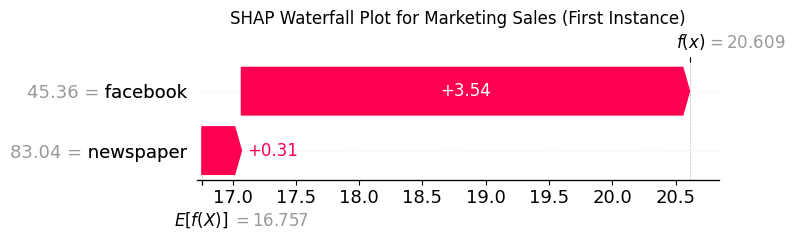


   - SHAP Summary plot to visualize feature importance:


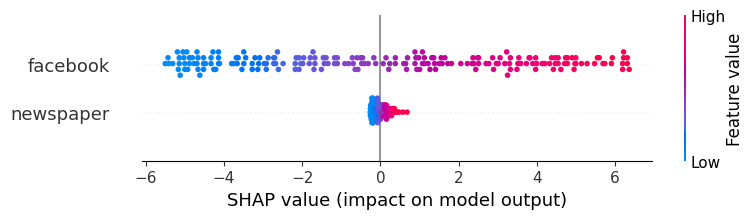


5. SHAP Interpretation:
   - How do features contribute? The summary plot shows that high spending on Facebook (red dots) consistently pushes the sales prediction higher (positive SHAP values). Newspaper spending has a much smaller, almost negligible, and inconsistent impact on the predictions (blue and red dots are clustered around the zero line).
   - Which channel has a stronger influence? The summary plot clearly ranks 'facebook' as the feature with the highest mean absolute SHAP value. Therefore, Facebook advertising has a significantly stronger influence on the model's sales predictions than Newspaper advertising.


In [15]:
try:
    marketing_df = pd.read_csv('Marketing_Dataset.csv')
except FileNotFoundError:
    print("Error: Marketing_Dataset.csv not found. Please check the file.")
    marketing_df = None

if marketing_df is not None:
    # Prepare the data, using only Facebook and Newspaper as specified
    X = marketing_df[['facebook', 'newspaper']]
    y = marketing_df['sales']

    # 1. Fit a multiple linear regression model
    model_mktg = LinearRegression()
    model_mktg.fit(X, y)

    coef_fb = model_mktg.coef_[0]
    coef_np = model_mktg.coef_[1]
    intercept = model_mktg.intercept_

    print("\n1. Fitted Multiple Linear Regression Model:")
    print(f"   - Equation: Sales = {intercept:.2f} + ({coef_fb:.2f} * Facebook) + ({coef_np:.2f} * Newspaper)")

    # 2. Interpret the model coefficients
    print("\n2. Interpretation of Coefficients:")
    print(f"   - Coefficient for Facebook ({coef_fb:.2f}): For each additional $1000 spent on Facebook ads, weekly sales are predicted to increase by {coef_fb:.2f} thousand units, holding newspaper spending constant.")
    print(f"   - Coefficient for Newspaper ({coef_np:.2f}): For each additional $1000 spent on Newspaper ads, weekly sales are predicted to change by {coef_np:.2f} thousand units, holding Facebook spending constant. (Note: A near-zero or negative coefficient suggests it has little to no unique positive impact in this model).")
    print(f"   - Intercept ({intercept:.2f}): If $0 is spent on both Facebook and Newspaper ads, the model predicts sales of {intercept:.2f} thousand units.")

    # 3. Make predictions
    pred_1 = model_mktg.predict([[50, 70]])[0]
    pred_2 = model_mktg.predict([[25, 30]])[0]
    print("\n3. Predictions:")
    print(f"   - Predicted sales for Facebook=50, Newspaper=70: {pred_1:.2f} thousand units")
    print(f"   - Predicted sales for Facebook=25, Newspaper=30: {pred_2:.2f} thousand units")

    # 4. Apply SHAP
    explainer_mktg = shap.Explainer(model_mktg.predict, X)
    shap_values_mktg = explainer_mktg(X)

    print("\n4. SHAP Analysis:")
    # Plot SHAP waterfall plot for the first data point
    print("   - SHAP Waterfall plot for the first prediction:")
    plt.figure()
    shap.plots.waterfall(shap_values_mktg[0], show=False)
    plt.title("SHAP Waterfall Plot for Marketing Sales (First Instance)")
    plt.tight_layout()
    plt.show()

    # Plot SHAP summary plot
    print("\n   - SHAP Summary plot to visualize feature importance:")
    shap.summary_plot(shap_values_mktg, X)

    # 5. Analyze and interpret SHAP values
    print("\n5. SHAP Interpretation:")
    print("   - How do features contribute? The summary plot shows that high spending on Facebook (red dots) consistently pushes the sales prediction higher (positive SHAP values). Newspaper spending has a much smaller, almost negligible, and inconsistent impact on the predictions (blue and red dots are clustered around the zero line).")
    print("   - Which channel has a stronger influence? The summary plot clearly ranks 'facebook' as the feature with the highest mean absolute SHAP value. Therefore, Facebook advertising has a significantly stronger influence on the model's sales predictions than Newspaper advertising.")